In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/images-test/img1.png
/kaggle/input/images-test/img4.png
/kaggle/input/images-test/img2.png
/kaggle/input/images-test/img3.png
/kaggle/input/images-test/s3.png
/kaggle/input/images-test/img5.png
/kaggle/input/images-test/s2.png
/kaggle/input/images-test/s1.png
/kaggle/input/models-files/readingwords-yolov8s-v4.pt
/kaggle/input/models-files/readingletters-yolov8l-v9.pt
/kaggle/input/models-files/readingletters-yolov8l-augv1.pt


In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 804.2/804.2 kB 14.0 MB/s eta 0:00:00a 0:00:01


In [3]:
from ultralytics import YOLO, hub
import cv2
import matplotlib.pyplot as plt

In [9]:
model_words = YOLO("/kaggle/input/models-files/readingwords-yolov8s-v4.pt")

In [10]:
model_letters = YOLO("/kaggle/input/models-files/readingletters-yolov8l-v4.pt")

In [11]:
img = cv2.imread('/kaggle/input/images-test/s2.png')
result = model_words(np.copy(img))[0]


0: 96x640 25 words, 106.1ms
Speed: 1.3ms preprocess, 106.1ms inference, 1.0ms postprocess per image at shape (1, 3, 96, 640)


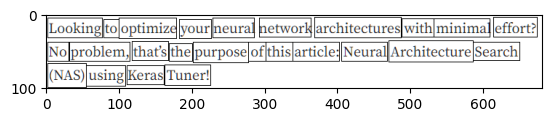

In [12]:
## detect words
cuts = []
boxes = []
for box in result.boxes:
    box = box.xyxy
    x, y, x2, y2 = int(box[0, 0].item()), int(box[0, 1].item()), int(box[0, 2].item()), int(box[0, 3].item())
    cuts.append(img[y:y2, x:x2, :])
    boxes.append((x, y, x2, y2))
    img = cv2.rectangle(img, (x, y), (x2, y2), (0, 0, 0), 1)

plt.imshow(img)

In [15]:
def nearest_in_list(number, list_of_numbers):
    closest = min(list_of_numbers, key=lambda x:abs(x-number))
    if abs(closest - number) == abs(number - min(n for n in list_of_numbers if n > number)):
        return min(n for n in list_of_numbers if n > number)
    else:
        return closest

In [ ]:
## organize words
xs = {}
for i in range(len(cuts)):
    x = nearest_in_list(boxes[i][1], np.arange(0, img.shape[0], 22).tolist())
    y = nearest_in_list(boxes[i][0], np.arange(0, img.shape[1], 22).tolist())

    xs[str(i)] = x + y*0.01
xs = sorted(xs.items(), key=lambda x:x[1], reverse=False)

for index, val in xs:
    plt.figure(figsize=(1, 1))
    plt.imshow(cuts[int(index)])


0: 352x640 1 a, 1 e, 1 k, 1 r, 1 s, 1574.7ms
Speed: 2.1ms preprocess, 1574.7ms inference, 1.2ms postprocess per image at shape (1, 3, 352, 640)
output : 
keras

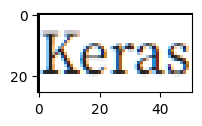

In [20]:
## detect letters in a words
img = np.copy(cuts[1])
plt.figure(figsize=(2, 2))
plt.imshow(img)

result = model_letters(img)[0]

dic = {} # "letter":x
cuts_letters = {} # cut:letter
for i in range(result.boxes.cls.shape[0]):
    classe = int(result.boxes.cls[i].item())
    l = result.names[classe]
    
    box = result.boxes[i].xyxy
    x, y, x2, y2 = int(box[0, 0].item()), int(box[0, 1].item()), int(box[0, 2].item()), int(box[0, 3].item())
    
    dic[l] = x
    cuts_letters[l] = img[y:y2, x:x2, :]

dic = sorted(dic.items(), key=lambda x:x[1], reverse=False)
print("output : ")
for l, val in dic:
    print(l, end="")
    #plt.figure(figsize=(1, 1))
    #plt.imshow(cuts_letters[l])

## all in one 

In [5]:
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline
from transformers import TextStreamer
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [6]:
model_id = "styalai/gemmamistakes-v2"

tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(model_id)
model = model.to(device)

tokenizer_config.json:   0%|          | 0.00/40.6k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/712 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/13.5k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/67.1M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/132 [00:00<?, ?B/s]

In [4]:
def nearest_in_list(number, list_of_numbers):
    closest = min(list_of_numbers, key=lambda x:abs(x-number))
    if abs(closest - number) == abs(number - min(n for n in list_of_numbers if n > number)):
        return min(n for n in list_of_numbers if n > number)
    else:
        return closest

loking to optimze your neural network aeitrsu with mnial efort- 



/opt/conda/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:540: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:545: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.8` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


looking to optimize your neural network with minimal effort-<end_of_turn><bos>


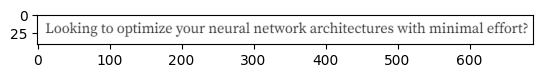

In [7]:
model_words = YOLO("/kaggle/input/models-files/readingwords-yolov8s-v4.pt")
model_letters = YOLO("/kaggle/input/models-files/readingletters-yolov8l-augv1.pt")

img = cv2.imread('/kaggle/input/images-test/s1.png', cv2.IMREAD_GRAYSCALE)
img = np.stack((img,)*3, axis=-1)

output = []

plt.imshow(img)
result = model_words.predict(np.copy(img), verbose=False)[0]###############
## detect words
cuts = []
boxes = []
for box in result.boxes:
    box = box.xyxy
    x, y, x2, y2 = int(box[0, 0].item()), int(box[0, 1].item()), int(box[0, 2].item()), int(box[0, 3].item())
    cuts.append(img[y:y2, x:x2, :])
    boxes.append((x, y, x2, y2))
    #img = cv2.rectangle(img, (x, y), (x2, y2), (0, 0, 0), 1)

## organize words
xs = {}
for i in range(len(cuts)):
    x = nearest_in_list(boxes[i][1], np.arange(0, img.shape[0], 22).tolist())
    y = nearest_in_list(boxes[i][0], np.arange(0, img.shape[1], 22).tolist())
    xs[str(i)] = x + y*0.01
    
xs = sorted(xs.items(), key=lambda x:x[1], reverse=False)

for index, val in xs: ### pour chaque mots
    cut = cuts[int(index)]
    
    ## detect letters in a words
    img = np.copy(cut)

    result = model_letters.predict(img, verbose=False)[0] #################
    names = result.names
    names[13] = ","
    
    dic = {} # "letter":x
    cuts_letters = {} # cut:letter
    for i in range(result.boxes.cls.shape[0]):
        classe = int(result.boxes.cls[i].item())
        l = result.names[classe]

        box = result.boxes[i].xyxy
        x, y, x2, y2 = int(box[0, 0].item()), int(box[0, 1].item()), int(box[0, 2].item()), int(box[0, 3].item())

        dic[l] = x
        cuts_letters[l] = img[y:y2, x:x2, :]

    dic = sorted(dic.items(), key=lambda x:x[1], reverse=False)
    for l, val in dic:
        print(l, end="")
        output.append(l)
    
    print(" ", end="")
    
print("\n")
chat = [
    { "role": "user", "content": "correct this sentence: " + ''.join(output)},
]
question = tokenizer.apply_chat_template(chat, tokenize=False, add_generation_prompt=True)
question = tokenizer(question, return_tensors="pt").to(device)

streamer = TextStreamer(tokenizer, skip_prompt=True)
_ = model.generate(**question, streamer=streamer,
                            eos_token_id=tokenizer.bos_token_id,
                            max_length=2048, 
                            temperature=0,
                            top_p=0.8,
                            repetition_penalty=1.25)